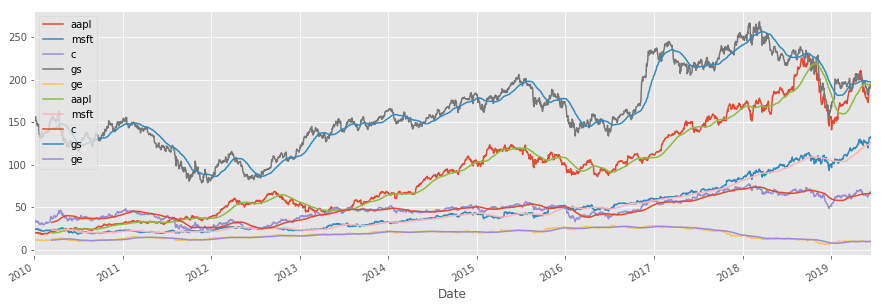

In [47]:
import bt
import pandas as pd
%matplotlib inline

data = bt.get('aapl, msft, c, gs, ge', start='2010-01-01')
sma = data.rolling(50).mean()
bt.merge(data, sma).plot(figsize=(15, 5))


Markdown Hello


In [32]:
signal = data > sma
signal.head(10)
sig = signal.loc['2019-06-04']
print(sig)
list(sig.index[sig])

aapl    False
msft    False
c       False
gs      False
ge       True
Name: 2019-06-04 00:00:00, dtype: bool


['ge']

Construct the above SMA strategy


In [50]:
s = bt.Strategy('above50sma', [bt.algos.SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
# Now we create the Backtest
t = bt.Backtest(s, data)

# Let's run it
res = bt.run(t)

above50sma
0% [############################# ] 100% | ETA: 00:00:00

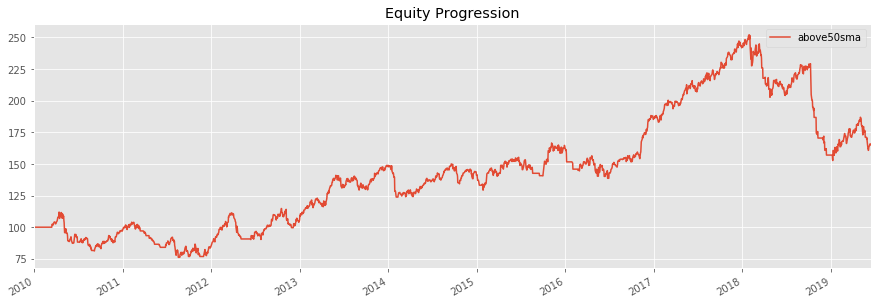

In [48]:
res.plot()

In [49]:
res.display()

Stat                 above50sma
-------------------  ------------
Start                2009-12-30
End                  2019-06-14
Risk-free rate       0.00%

Total Return         65.45%
Daily Sharpe         0.39
Daily Sortino        0.58
CAGR                 5.47%
Max Drawdown         -39.43%
Calmar Ratio         0.14

MTD                  -1.35%
3m                   -5.26%
6m                   5.37%
YTD                  5.37%
1Y                   -22.11%
3Y (ann.)            5.69%
5Y (ann.)            3.92%
10Y (ann.)           5.47%
Since Incep. (ann.)  5.47%

Daily Sharpe         0.39
Daily Sortino        0.58
Daily Mean (ann.)    6.96%
Daily Vol (ann.)     17.97%
Daily Skew           -0.68
Daily Kurt           4.63
Best Day             5.78%
Worst Day            -7.99%

Monthly Sharpe       0.36
Monthly Sortino      0.58
Monthly Mean (ann.)  7.49%
Monthly Vol (ann.)   20.72%
Monthly Skew         -0.62
Monthly Kurt         0.61
Best Month           13.64%
Worst Month          -17.26